In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
data = pd.read_csv('Position_Salaries.csv')

In [3]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Definition about whether a regression is linear or not is dependent on whether the output could be predicted with linear combination of observables

In [4]:
data['Position'].value_counts()

Country Manager      1
Manager              1
CEO                  1
Region Manager       1
Junior Consultant    1
C-level              1
Senior Partner       1
Business Analyst     1
Partner              1
Senior Consultant    1
Name: Position, dtype: int64

Given that the categorical variables is not different from the level informaiton, we don't need to use it for our prediction.

In [5]:
X = np.array(data['Level']).reshape(-1,1)
y = np.array(data['Salary']).reshape(-1,1)

We only have 10 data points, we won't split the data into training and testing set.

To be able to compare, we will build two different models: linear regression and polynomial regression, considering that we only have one independent variables.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# To be able to fit a polynomial regression, we need to create polynoimal features first
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly_reg = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_reg.fit_transform(X)

In [10]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

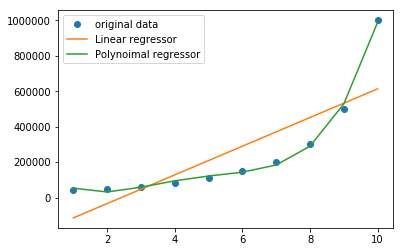

In [11]:
# Visualze the regression result
plt.plot(X,y,'o', label='original data')
plt.plot(X, lin_reg.predict(X), label='Linear regressor')
plt.plot(X, lin_reg2.predict(X_poly), label='Polynoimal regressor' )

plt.legend()

We could see from the above plot the the polynomial regression is not smooth. We need to create more smooth lines

In [12]:
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1,1)

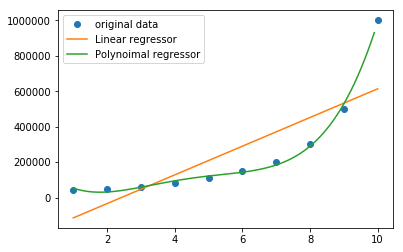

In [13]:
plt.plot(X,y,'o', label='original data')
plt.plot(X, lin_reg.predict(X), label='Linear regressor')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), label='Polynoimal regressor' )

plt.legend()

In [17]:
poly_reg.transform(6.5)

array([[    6.5   ,    42.25  ,   274.625 ,  1785.0625]])

In [19]:
# Predict the new salary
lin_reg.predict(6.5)

array([[ 330378.78787879]])

In [20]:
lin_reg2.predict(poly_reg.transform(6.5))

array([[ 158862.45265154]])

In [23]:
# Evaluate the model performance by calculating R2
n = len(y)
ss_tot = (n - 1) * y.var()
ss_res = np.sum(np.square(lin_reg2.predict(poly_reg.fit_transform(X)).reshape(-1,1)- y))
R2 = 1 - ss_res/ss_tot
print('R2 for polynomial regression:{}'.format(R2))

R2 for polynomial regression:0.9971025435229568
